<a href="https://colab.research.google.com/github/redrobot279/PyTorch-Tutorial-Youtube-Practice/blob/main/my_first_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

We have our image. A feature map is created to determine where the brders of the image are. Antoher layer has a pooled featured map where it basically sumarrizes all the is learned in prevoius layers. As we advance in the CNN this feature map which is basically a matrix of information is flattend.
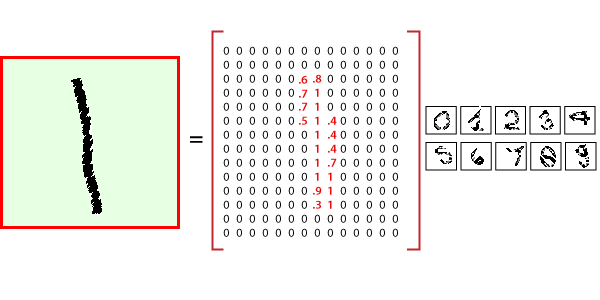

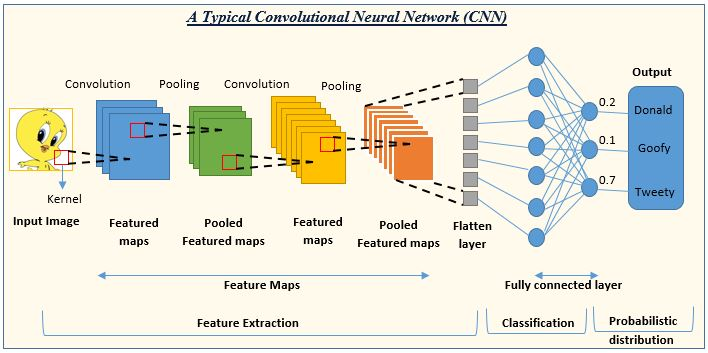

# Image Filters or kernels

We take an image and we break it down into 1 and 0. Anything in the middle is shade of black. We use an image filter/kernel, that is usually a small matrix ex: 3x3. So the kernel is appied to the image and it is going to transform the first 3x3 matrix in the original image. It does it by multiplying the 3x3 patch from the orignal image with the 3x3 filter/kernel and we wned up with the output. One way to get a result is by adding up the result of all the numbers in the matrix, another by selecting the highest number. Then we move a step to the right and transform again.

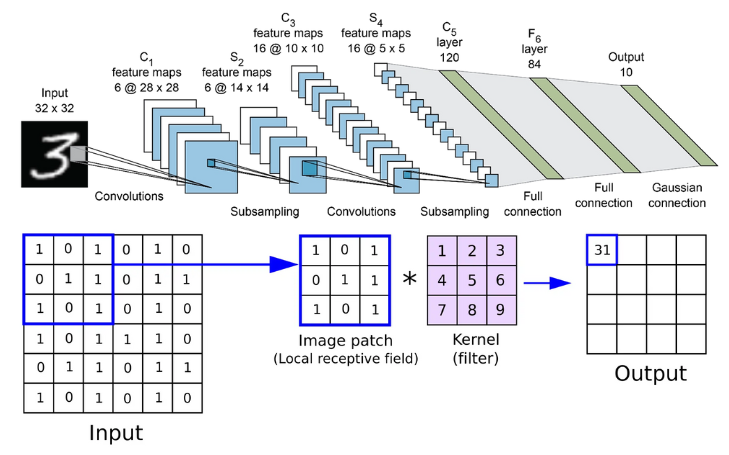

# Convolutional Layer
The goal is to learn the weights that the kernel should have in order to extract information from the image.


In [ ]:
#CNN

#Import data set

import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Convert MNIST Image Files into a tensor of 4 dimensions (# Images, Height, Width, Color Channel)

transform1 = transforms.ToTensor()

In [ ]:
# Train Data
train_data= datasets.MNIST(root= '/first_cnn_data', train= True, download= True, transform=transform1) #MNIST data set is already in the "import datasets on top", We set root to save it locally

In [ ]:
# Test Data
test_data= datasets.MNIST(root= '/first_cnn_data', train= False, download= True, transform=transform1)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /first_cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /first_cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
# Determine batch size, we usually want small bach sizes

batch_size1= 10

train_loader= DataLoader(train_data, batch_size=batch_size1, shuffle= True)
test_loader= DataLoader(test_data, batch_size=batch_size1, shuffle= False)

In [ ]:
# Define our CNNN Model
# Describe convolutional layer and what it is doing (2 layers in this case)

conv1= nn.Conv2d(1, 6, 3, 1)
conv2= nn.Conv2d(6, 16, 3, 1)

In [ ]:
# Grab 1 MNIST record/image

for i, (X_Train, y_train) in enumerate(train_data):
    break

In [ ]:
X_Train.shape # 1 image that is 28x28

torch.Size([1, 28, 28])

In [ ]:
x = X_Train.view(1, 1, 28, 28) # 1 image that is 28x28

In [ ]:
# Perform our first convolution

x = f.relu(conv1(x))

In [ ]:
# 1 sigle image
# 6 are the filters/feature map
# 26 image size, it looses 2 because it has a default padding of 2

x.shape

torch.Size([1, 6, 26, 26])

In [ ]:
# pass thru the pooling layer

x = f.max_pool2d(x, 2, 2) #kernel of 2 and stride of 2

In [ ]:
x.shape

torch.Size([1, 6, 13, 13])

In [ ]:
# Second convolutional layer

x = f.relu(conv2(x))

In [ ]:
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
# Second pooling layer

x = f.max_pool2d(x, 2, 2)

In [ ]:
x.shape

torch.Size([1, 16, 5, 5])

# CNN Model

In [ ]:
class ConvoNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1= nn.Conv2d(1, 6, 3, 1)
    self.conv2= nn.Conv2d(6, 16, 3, 1)

    #Fully Connected Layer
    self.fc1= nn.Linear(5*5*16, 120)
    self.fc2= nn.Linear(120, 84)
    self.fc3= nn.Linear(84, 10) #it ends in 10 because that is the number of classes we have in this dataset

  #Forward function that pushes data
  def forward(self, x):
    x= f.relu(self.conv1(x))
    x= f.max_pool2d(x, 2, 2)  #2*2 kernel, stride = 2

    #Second pass
    x= f.relu(self.conv2(x))
    x= f.max_pool2d(x, 2, 2)

    #Re-View to flatten out data

    x= x.view(-1, 16*5*5) #negative 1 so that we can vary the batch size

    #fully connected layer

    x= f.relu(self.fc1(x))
    x= f.relu(self.fc2(x))
    x= self.fc3(x)

    return f.log_softmax(x, dim=1)

In [ ]:
#Create instance

torch.manual_seed(41)
model= ConvoNet()
model

ConvoNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
#Loss Function Optmizer

criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr= 0.001)

In [ ]:
import time
start_time = time.time()

#Create Variables to track things

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#For loop of epochs

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1 #starts batches at 1
    y_pred = model(X_train) #get predicted values from training set
    loss= criterion(y_pred, y_train) #calculate loss

    predicted = torch.max(y_pred.data,1) [1] # add up the number of correct predictions
    batch_corr = (predicted == y_train).sum() # how many we got corrected from this batch. True = 1, False = 0 , then we add up
    trn_corr += batch_corr # keep track as we go along in training

    #Backprop (Update parameters)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print out results
    if b%600 == 0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Test
  with torch.no_grad(): # no gradient so we don't update our weights ans biases with test data
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] #addign up correct predictions
      ts_corr = []
      ts_corr += (predicted == y_test).sum() # T=1 F -1 and sum away

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


current_time = time.time()
total_time= (current_time - start_time)
print(f'Training took: {total_time/60} minutes!')

epoch: 0  batch: 600  loss: 0.005851339548826218
epoch: 0  batch: 1200  loss: 0.3855525553226471
epoch: 0  batch: 1800  loss: 0.004819948226213455
epoch: 0  batch: 2400  loss: 0.003216963727027178
epoch: 0  batch: 3000  loss: 0.0332382395863533
epoch: 0  batch: 3600  loss: 0.5372857451438904
epoch: 0  batch: 4200  loss: 0.04561494290828705
epoch: 0  batch: 4800  loss: 0.0007510822033509612
epoch: 0  batch: 5400  loss: 0.0001173773780465126
epoch: 0  batch: 6000  loss: 0.14201366901397705


TypeError: iteration over a 0-d tensor

In [ ]:
import time
import torch

# Assuming the following are defined:
# - train_loader: DataLoader for training data
# - test_loader: DataLoader for test data
# - model: instance of Model class
# - criterion: loss function (e.g., nn.CrossEntropyLoss())
# - optimizer: optimization algorithm (e.g., torch.optim.SGD or Adam)

start_time = time.time()

# Create Variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop of epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Train
    model.train()  # Set the model to training mode
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1  # starts batches at 1
        y_pred = model(X_train)  # get predicted values from training set
        loss = criterion(y_pred, y_train)  # calculate loss

        predicted = torch.max(y_pred.data, 1)[1]  # add up the number of correct predictions
        batch_corr = (predicted == y_train).sum()  # how many we got correct from this batch. True = 1, False = 0, then we add up
        trn_corr += batch_corr.item()  # keep track as we go along in training

        # Backprop (Update parameters)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print out results
        if b % 600 == 0:
            print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

    train_losses.append(loss.item())
    train_correct.append(trn_corr)

    # Test
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # no gradient so we don't update our weights and biases with test data
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]  # add up correct predictions
            tst_corr += (predicted == y_test).sum().item()  # T=1 F=0 and sum away

        loss = criterion(y_val, y_test)
        test_losses.append(loss.item())
        test_correct.append(tst_corr)

current_time = time.time()
total_time = (current_time - start_time)
print(f'Training took: {total_time / 60:.2f} minutes!')

# Optionally, print the final results
print(f'Final Training Loss: {train_losses[-1]:.4f}')
print(f'Final Test Loss: {test_losses[-1]:.4f}')
print(f'Final Training Accuracy: {train_correct[-1] / len(train_loader.dataset):.4f}')
print(f'Final Test Accuracy: {test_correct[-1] / len(test_loader.dataset):.4f}')


Epoch: 0  Batch: 600  Loss: 0.023733172565698624
Epoch: 0  Batch: 1200  Loss: 0.003455493599176407
Epoch: 0  Batch: 1800  Loss: 0.0008372392621822655
Epoch: 0  Batch: 2400  Loss: 0.010705141350626945
Epoch: 0  Batch: 3000  Loss: 0.008078320883214474
Epoch: 0  Batch: 3600  Loss: 0.0011862406972795725
Epoch: 0  Batch: 4200  Loss: 0.038080841302871704
Epoch: 0  Batch: 4800  Loss: 0.0016068397089838982
Epoch: 0  Batch: 5400  Loss: 0.138673797249794
Epoch: 0  Batch: 6000  Loss: 0.2449204921722412
Epoch: 1  Batch: 600  Loss: 0.007151054684072733
Epoch: 1  Batch: 1200  Loss: 0.011097034439444542
Epoch: 1  Batch: 1800  Loss: 0.0017998721450567245
Epoch: 1  Batch: 2400  Loss: 0.0001049584461725317
Epoch: 1  Batch: 3000  Loss: 0.0031431831885129213
Epoch: 1  Batch: 3600  Loss: 0.003668801160529256
Epoch: 1  Batch: 4200  Loss: 0.0037249946035444736
Epoch: 1  Batch: 4800  Loss: 0.00015864608576521277
Epoch: 1  Batch: 5400  Loss: 0.0796482041478157
Epoch: 1  Batch: 6000  Loss: 0.0808732658624649
Ep